# Wordcloud con Bigramas por categoría de review

Para incorporar n-gramas en una WordCloud, el uso de CountVectorizer o TfidfVectorizer es clave porque estos transforman el texto en vectores que representan la frecuencia de aparición de las palabras o n-gramas (grupos de palabras consecutivas) en el texto.

CountVectorizer cuenta la frecuencia de palabras o n-gramas (puedes definir ngram_range para incluir bigramas o trigrama).

TfidfVectorizer también puede usarse para n-gramas, pero en lugar de solo contar, ajusta las frecuencias según su importancia en el corpus, eliminando palabras que son demasiado comunes o poco relevantes.

In [ ]:
import pandas as pd  # Para manipulación y análisis de datos en estructuras tipo DataFrame
import re  # Para trabajar con expresiones regulares (limpieza y búsqueda en texto)
from sklearn.feature_extraction.text import CountVectorizer  # Para convertir texto en vectores de frecuencia (bolsa de palabras)
from wordcloud import WordCloud  # Para generar nubes de palabras a partir de texto
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
from nltk.corpus import stopwords  # Para acceder a listas de palabras vacías (stopwords) en distintos idiomas
import nltk  # Biblioteca para procesamiento de lenguaje natural (descarga y uso de recursos como stopwords)
!pip install -q gdown  # Comando para instalar la librería gdown (descargar archivos de Google Drive)
import gdown  # Para descargar archivos directamente desde Google Drive usando el ID del archivo
nltk.download('stopwords')  # Descarga las stopwords desde NLTK
stop_words = list(set(stopwords.words('spanish')))  # Obtiene y convierte a lista las stopwords en español


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# OPCIÓN 1: Importando con csv almacenado en mi Google Drive
""" # Importar la base de datos
df = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/zonaprop_silver.csv')"""

" # Importar la base de datos\ndf = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/zonaprop_silver.csv')"

In [ ]:
# OPCIÓN 2: Utilizamos gdown para que cada usuario que acceda a la notebook acceda a los datos sin necesidad de subir el dataset manualmente a su dispositivo.
"""# https://docs.google.com/spreadsheets/d/1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8/edit?usp=sharing&ouid=108420908985304856568&rtpof=true&sd=true

# ID del archivo compartido en Google Drive
file_id = '1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'zonaprop_silver.csv', quiet=False)

# Leemos el archivo CSV descargado
df = pd.read_csv('zonaprop_silver.csv', encoding='ISO-8859-1')

# Mostramos las primeras filas
df.head(10)"""

"# https://docs.google.com/spreadsheets/d/1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8/edit?usp=sharing&ouid=108420908985304856568&rtpof=true&sd=true\n\n# ID del archivo compartido en Google Drive\nfile_id = '1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8'\nurl = f'https://drive.google.com/uc?id={file_id}'\n\n# Descargamos el archivo con gdown\ngdown.download(url, 'zonaprop_silver.csv', quiet=False)\n\n# Leemos el archivo CSV descargado\ndf = pd.read_csv('zonaprop_silver.csv', encoding='ISO-8859-1')\n\n# Mostramos las primeras filas\ndf.head(10)"

In [ ]:
# Opción 3: utilizamos regex para que detectar el id. Usamos re.search() (módulo re de expresiones regulares) para buscar cualquier texto entre /d/ y el próximo /.
# Devuelve el ID sin importar que tenga parámetros como ?usp=sharing, etc.
link = 'https://docs.google.com/spreadsheets/d/1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8/edit?usp=sharing&ouid=108420908985304856568&rtpof=true&sd=true'

#re.search() es una función que busca un patrón dentro de una cadena de texto.
#r'/d/([a-zA-Z0-9_-]+)' es el patrón que se está buscando. Esto es una expresión regular que busca una secuencia específica de caracteres.
# La expresión busca una parte del texto que comience con "/d/" seguido de letras, números, guiones o guiones bajos
#link es la cadena de texto dentro de la cual se está buscando.
#.group(1) extrae una parte específica del patrón encontrado llamada grupo de captura.

file_id = re.search(r'/d/([a-zA-Z0-9_-]+)', link).group(1)

# Creamos la URL de descarga directa usando el file ID
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown, 'quiet=False' muestra el progreso de la descarga
gdown.download(url, 'zonaprop_silver.csv', quiet=False)

# Leemos el archivo CSV descargado en un DataFrame de Pandas
# 'encoding='ISO-8859-1'' especifica la codificación del archivo para evitar errores
df = pd.read_csv('zonaprop_silver.csv', encoding='UTF-8')

# Mostramos las primeras 10 filas del DataFrame para una vista previa
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1Z5-mb7D0Dm4WxiFrsHLvfqZqQ8XoPMm8
To: /content/zonaprop_silver.csv
100%|██████████| 100k/100k [00:00<00:00, 3.74MB/s]


,descripción,m2,precio,barrio,centro
0,Venta Terreno Mar de Plata Zona Puerto,9069,1490000,"Puerto, Mar del Plata",0
1,Local Comercial en Venta en Mar del Plata,77,99000,"Centro, Mar del Plata",1
2,Terreno en Venta - 506 m2 - Los Acantilados,506,20000,"Los Acantilados, Mar del Plata",0
3,Local | Tejedor Al 400,39,1,"Los Pinares, Mar del Plata",0
4,Terreno - Mar del Plata,1417,27000,"Sierra de los Padres, Mar del Plata",0
5,Venta Departamento a Estrenar Zona Chauvin,41,99000,"Chauvín, Mar del Plata",0
6,PH 2 Amb a La Calle Semi Nuevo,42,65000,"Macrocentro, Mar del Plata",0
7,Local Comercial - Centro,79,95000,"Centro, Mar del Plata",1
8,"Galpón en PH, en El Barrio San Juan.",169,130000,"Barrio San Juan, Mar del Plata",0
9,Casa - P. Luro,330,260000,"Parque Luro, Mar del Plata",0


In [ ]:
# Previsualizamos el df
df.head(20)

,descripción,m2,precio,barrio,centro
0,Venta Terreno Mar de Plata Zona Puerto,9069,1490000,"Puerto, Mar del Plata",0
1,Local Comercial en Venta en Mar del Plata,77,99000,"Centro, Mar del Plata",1
2,Terreno en Venta - 506 m2 - Los Acantilados,506,20000,"Los Acantilados, Mar del Plata",0
3,Local | Tejedor Al 400,39,1,"Los Pinares, Mar del Plata",0
4,Terreno - Mar del Plata,1417,27000,"Sierra de los Padres, Mar del Plata",0
5,Venta Departamento a Estrenar Zona Chauvin,41,99000,"Chauvín, Mar del Plata",0
6,PH 2 Amb a La Calle Semi Nuevo,42,65000,"Macrocentro, Mar del Plata",0
7,Local Comercial - Centro,79,95000,"Centro, Mar del Plata",1
8,"Galpón en PH, en El Barrio San Juan.",169,130000,"Barrio San Juan, Mar del Plata",0
9,Casa - P. Luro,330,260000,"Parque Luro, Mar del Plata",0


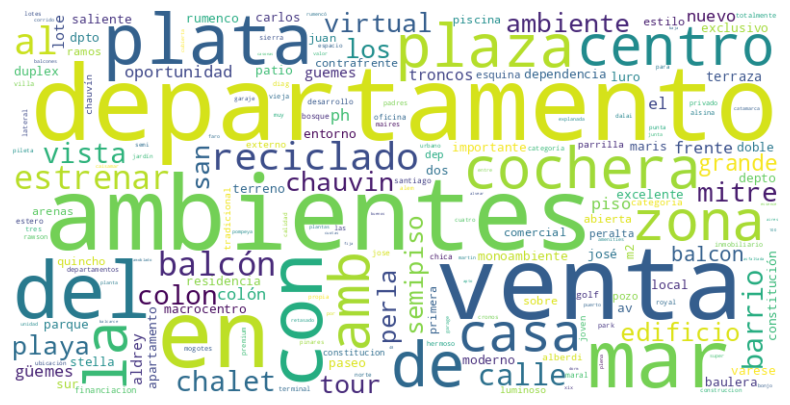

In [ ]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(1,1))

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['descripción'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

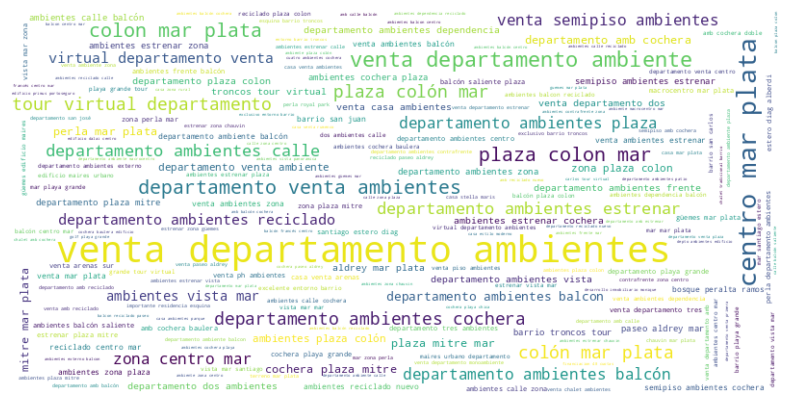

In [ ]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['descripción'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Vamos a incorporar nuevos valores a la lista stop_words
stop_words.extend(["mar","plata","venta","departamento"])


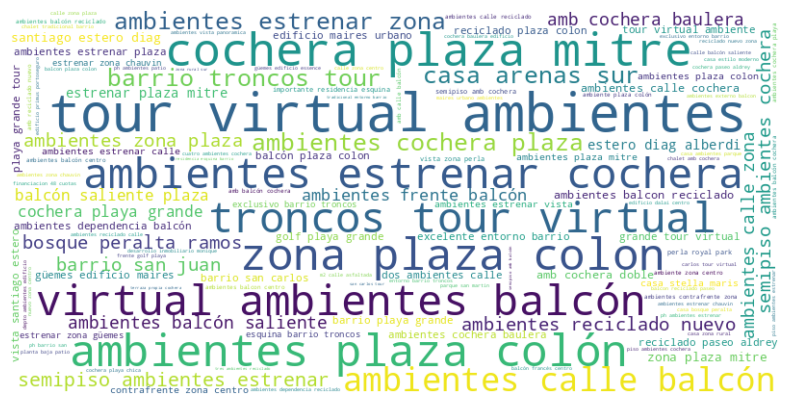

In [ ]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['descripción'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Convertimos el diccionario en df
df_n_grams_freq = pd.DataFrame(list(n_grams_freq.items()), columns=['Término', 'Frecuencia'])


In [ ]:
# Ordenamos el df
dfgrams = df_n_grams_freq.sort_values(by='Frecuencia', ascending=False)

In [ ]:
# Visualizamos los primeros 20 ngramas con mayor frecuencia.
dfgrams.head(20)

,Término,Frecuencia
1779,tour virtual ambientes,15
796,cochera plaza mitre,11
1891,zona plaza colon,10
343,ambientes plaza colón,10
1801,troncos tour virtual,9
1830,virtual ambientes balcón,9
286,ambientes estrenar cochera,9
651,casa arenas sur,8
548,barrio troncos tour,8
1704,semipiso ambientes estrenar,8
